#HW 10 CLUSTERING BUSINESS

#cluster time trends in NYC businesses: 
#DATA
#Census Business data:
##download census data for businesses by ZIP code. the data is here
http://www.census.gov/econ/cbp/download/
##and it can be downloaded by hand. you can also download it with 3 terminal commands as follows: the data from 1993 through 2001 is different in the format of its path than the data after 2001 (that is why more than one for loop is needed)



In [ ]:
$ for ((y=93; y<=99; y+=1)); do wget ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp$y\totals.zip; done

$ for ((y=0; y<=9; y+=1)); do wget ftp://ftp.census.gov/econ200$y\/CBP_CSV/zbp0$y\totals.zip; done

$ for ((y=10; y<=15; y+=1)); do wget ftp://ftp.census.gov/econ20$y\/CBP_CSV/zbp$y\totals.zip; done


#NYC zip codes shape file is here
##http://data.nycprepared.org/dataset/nyc-zip-code-tabulation-areas/resource/0c0e14e9-78e1-404e-97b0-c2fabceb3981


NOTES: 
to read in a zip file without unzipping it you can use the pandas and zipfile packages


you may need to clean your data: for some NYC zip codes there may be no info
    
sanity check: you should have 20 (Ntimestamps) datapoints per time series and about 250 zipcodes (Nzipcodes)

##Cleaning Data

In [1]:
import json
import urllib2
import zipfile 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
url = "https://nycdatastables.s3.amazonaws.com/2013-08-19T18:18:28.877Z/nyc-zip-code-tabulation-areas-polygons.geojson"
request = urllib2.urlopen(url)
nyc = json.load(request)
%pylab inline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Populating the interactive namespace from numpy and matplotlib


In [2]:
colors = [
    '#FFB300', # Vivid Yellow
    '#A6BDD7', # Very Light Blue
    '#C10020', # Vivid Red
    '#817066', # Medium Gray
    '#007D34', # Vivid Green
    '#F6768E', # Strong Purplish Pink
    '#00538A', # Strong Blue
    '#FF7A5C', # Strong Yellowish Pink
    '#53377A', # Strong Violet
    '#FF8E00', # Vivid Orange Yellow
    '#B32851', # Strong Purplish Red
    '#F4C800', # Vivid Greenish Yellow
    '#7F180D', # Strong Reddish Brown
    '#93AA00', # Vivid Yellowish Green
    '#593315', # Deep Yellowish Brown
    '#F13A13', # Vivid Reddish Orange
    '#232C16', # Dark Olive Green
    ]

In [3]:
zip = []
for department in nyc['features']:
    zip.append(str(department['properties']["postalCode"]))

In [4]:
import os
path = os.getcwd()+'/data'
path
os.chdir(path)

In [5]:
tr0 = range(1994,2014)
tr1 = range(1998,2003)
ffname = "zbp{0}totals.zip"
bizzip = set()
for i in tr0:
    #the columns in tr1 are written in upper case, we need to replace them with lower case
    if i in tr1:
        st = str(i)[2:]
        fname = ffname.format(st)
        zf = zipfile.ZipFile(fname)
        df = pd.read_csv(zf.open(fname.replace('.zip','.txt')),dtype={'ZIP':str})
        df.columns=[u'zip', u'name', u'empflag', u'emp', u'qp1', u'ap', u'est']
    else:
        st = str(i)[2:]
        fname = ffname.format(st)
        zf = zipfile.ZipFile(fname)
        df = pd.read_csv(zf.open(fname.replace('.zip','.txt')),dtype={'zip':str})
    newzip = set(df.zip).intersection(set(zip))
    bizzip = bizzip.union(newzip)

In [8]:
bizzzip = sorted(bizzip)
bizzipdata = pd.DataFrame(np.nan,index=bizzip,columns=tr0)

In [10]:
for i in tr0:
    if i in tr1:
        st = str(i)[2:]
        fname = ffname.format(st)
        zf = zipfile.ZipFile(fname)
        df = pd.read_csv(zf.open(fname.replace('.zip','.txt')),dtype={'ZIP':str})
        df.columns=[u'zip', u'name', u'empflag', u'emp', u'qp1', u'ap', u'est']
    else:
        st = str(i)[2:]
        fname = ffname.format(st)
        zf = zipfile.ZipFile(fname)
        df = pd.read_csv(zf.open(fname.replace('.zip','.txt')),dtype={'zip':str})
    for j in bizzip:
        if j in list(set(df.zip)):
            biz = df[df.zip==j]
            bizzipdata.loc[j][i]=int(biz.est)

In [11]:
bizzipdata = bizzipdata.dropna()
bizzip = bizzipdata.index
bizzipdata.to_csv('outcomes.csv',index_label='zip')
outcomes = pd.read_csv('outcomes.csv',index_col='zip')

In [12]:
outcomes

1994  1995  1996  1997  1998  1999  2000  2001  2002  2003  2004  2005  \
zip                                                                             
10453   441   433   467   489   499   480   493   501   530   534   547   547   
10452   438   435   472   511   508   530   528   543   604   625   634   644   
10451   693   686   712   698   695   667   649   653   695   709   725   727   
10457   559   563   606   630   625   615   635   629   675   699   660   671   
10456   355   346   386   388   414   420   428   439   477   501   494   496   
10455   456   466   509   523   529   517   518   526   556   574   590   613   
10454   452   459   472   479   486   492   491   503   543   552   559   554   
10105    79    58    61    47    38    45    45    47    52    54    62    58   
10104    91    80    63    46    43    39    36    40    39    40    44    40   
10459   408   408   440   472   465   469   459   480   486   500   497   498   
10458   934   902   956   994  1014   967   984   960   987  1000   993  1002   
11232   880   904   925   987  1017  1015  1006  1024  1104  1124  1095  1107   
10103   113   134   133   154   156   151   141   143   131   128   143   120   
10010  3019  2987  3029  3112  3152  3143  3203  3178  3085  3045  3059  3060   
11385  1427  1452  1460  1426  1475  1448  1445  1441  1507  1518  1558  1626   
11234  1554  1551  1515  1549  1557  1575  1561  1537  1603  1618  1605  1636   
11235  1488  1523  1551  1653  1729  1754  1803  1853  1936  1969  2048  2088   
11237   648   675   687   701   714   716   698   719   725   736   762   728   
11218   985  1015  1049  1075  1118  1149  1161  1180  1228  1247  1295  1332   
10055    27    30    28    24    17    17    21    19    28    37    44    45   
11201  2047  2018  2055  2077  2116  2124  2131  2148  2284  2305  2349  2385   
11203   660   665   676   654   668   667   670   661   697   681   701   724   
10128  1435  1528  1541  1541  1568  1632  1640  1609  1629  1671  1716  1719   
11205   609   619   645   677   690   692   717   725   742   759   766   787   
11204  1287  1297  1334  1374  1444  1481  1656  1686  1569  1649  1733  1778   
11207   620   656   686   702   718   705   708   715   745   733   737   746   
11206   782   756   774   768   775   795   791   806   856   874   913   929   
11209  1552  1588  1658  1672  1681  1717  1731  1733  1815  1843  1843  1840   
10122   330   354   312   286   285   282   292   270   217   218   215   201   
10121   107   111   100   106   103   111   118   104   101    98    90    87   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
10278     5     3     6     6     6    13    12    13     9     7     8     7   
10475   271   272   280   274   266   274   281   291   317   316   327   343   
10474   542   561   556   561   544   544   547   551   594   601   601   618   
10151   101   109   105    95    92    91    94    93    58    55    55    66   
10471   420   392   376   373   370   391   386   368   362   367   375   386   
10470   279   282   286   298   295   298   267   271   278   277   291   291   
10473   269   258   285   294   318   325   317   306   329   348   345   345   
10472   406   423   419   421   437   441   434   432   467   451   460   473   
10080   361   349   348   248   255   259   843   901  1008  1111    28    34   
10081    13    11     9    11    10     9     9     8     8    16    19    20   
10178    89    92    84    82    82    77    78    77    72    67    63    70   
11371    50    58    67    75    72    77    77    83    92    92    84    92   
10170   250   276   297   312   325   324   337   334   296   303   309   292   
10171    30    28    23    17    19    29    31    33    37    42    41    45   
10172    60    70    78    87    90    70    87    68    48    47    47    46   
10173   173   174   178   171   163   150   159   117    74    70    67    65   
10174   121   115   106   104   105   

In [13]:
for i in range(len(outcomes)):
    outcomes.iloc[i] = (outcomes.iloc[i]-np.mean(outcomes.iloc[i]))/np.std(outcomes.iloc[i])

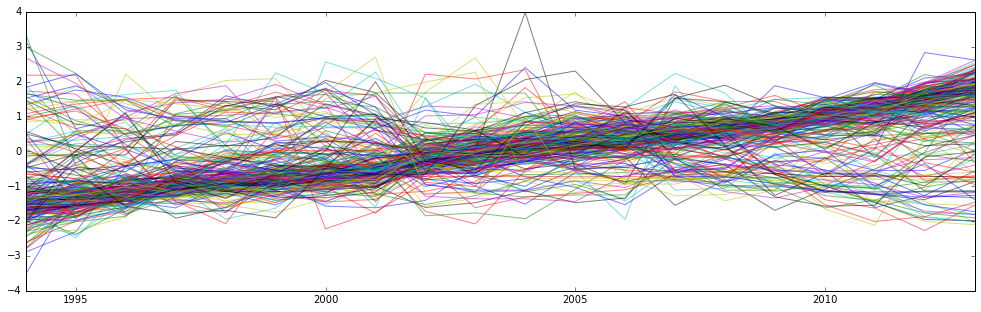

In [14]:
plt.figure(figsize=(17,5))
plt.xlim(1994,2013)
for i in range(len(outcomes)):
    plt.plot(outcomes.iloc[i],alpha=0.5)

In [15]:
#find the best clusters
clusters=[0]*5
for k in range(0,5):
    est=KMeans(n_clusters=k+2,n_init=100)
    est.fit(outcomes)
    clusters[k]=silhouette_score(outcomes, est.labels_)
    print('{0}clusters: {1}'.format(k+2,clusters[k]))

2clusters: 0.561611135742
3clusters: 0.530531696129
4clusters: 0.42388512067
5clusters: 0.269013815561
6clusters: 0.217342337706


2 clusters is the best.

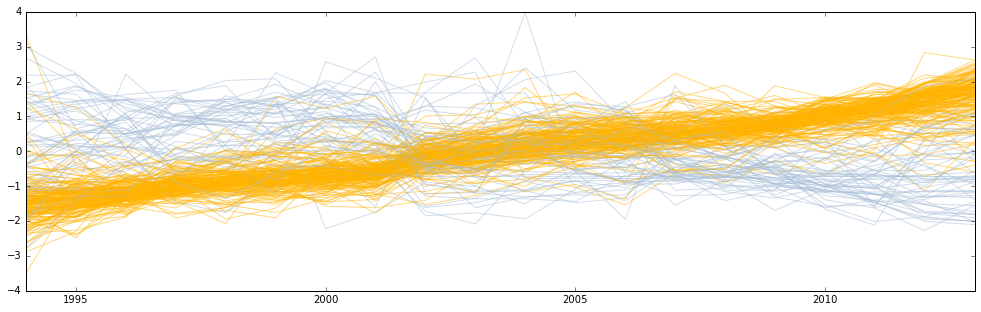

In [16]:
#cluster = 2
est=KMeans(n_clusters=2,n_init=100)
est.fit(outcomes)
labels2=est.labels_

plt.figure(figsize=(17,5))
plt.xlim(1994,2013)
for i in range(len(outcomes)):
    plt.plot(outcomes.iloc[i], c=colors[labels2[i]],alpha=0.5)
    

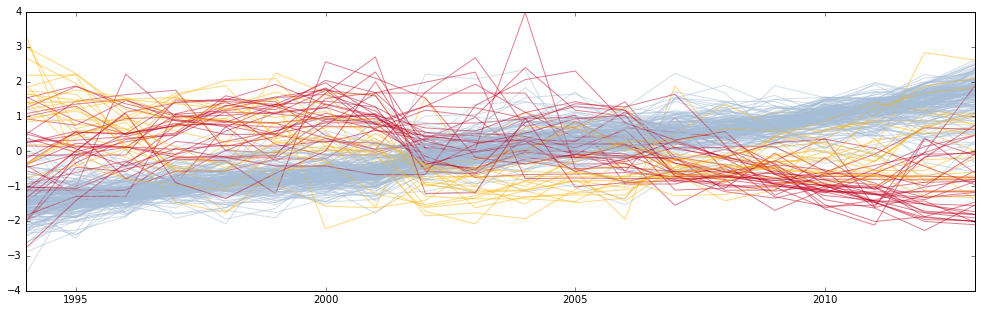

In [17]:
#cluster = 3
est=KMeans(n_clusters=3,n_init=100)
est.fit(outcomes)
labels3=est.labels_

plt.figure(figsize=(17,5))
plt.xlim(1994,2013)
for i in range(len(outcomes)):
    plt.plot(outcomes.iloc[i], c=colors[labels3[i]],alpha=0.5)
    

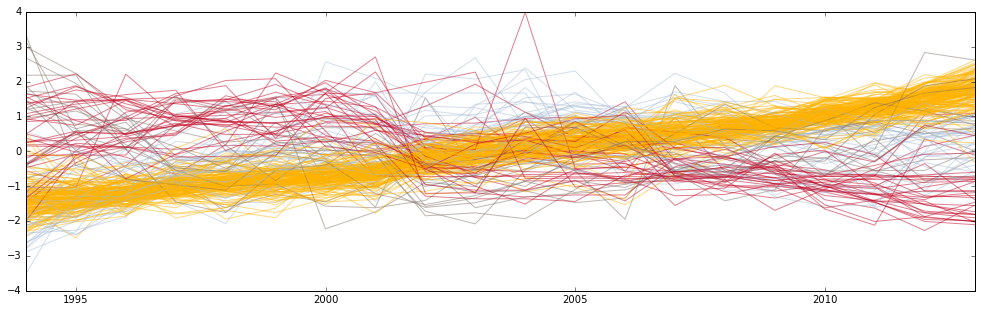

In [18]:
#cluster = 4
est=KMeans(n_clusters=4,n_init=100)
est.fit(outcomes)
labels4=est.labels_

plt.figure(figsize=(17,5))
plt.xlim(1994,2013)
for i in range(len(outcomes)):
    plt.plot(outcomes.iloc[i], c=colors[labels4[i]],alpha=0.5)
    

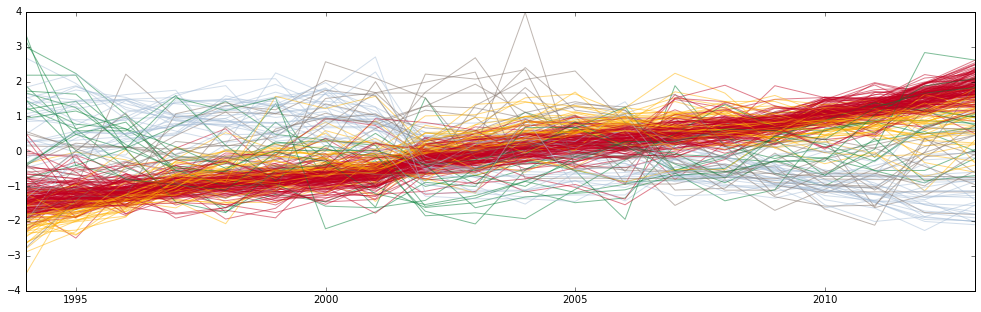

In [19]:
#cluster = 5
est=KMeans(n_clusters=5,n_init=100)
est.fit(outcomes)
labels5=est.labels_

plt.figure(figsize=(17,5))
plt.xlim(1994,2013)
for i in range(len(outcomes)):
    plt.plot(outcomes.iloc[i], c=colors[labels5[i]],alpha=0.5)
    

In [20]:
labels = est.labels_
labels

array([2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 1, 3, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 0, 1, 1, 4, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 0, 2, 2, 2, 4,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 1, 3, 1, 4, 2, 2, 1, 2, 2, 0,
       2, 2, 4, 4, 2, 0, 3, 2, 0, 1, 3, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 3, 1, 2,
       2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       2, 3, 0, 2, 2, 2, 2, 0, 2, 2, 2, 1, 4, 3, 4, 4, 4, 2, 2, 0, 1, 2, 0,
       0, 0, 2, 1, 3, 4, 0, 0, 0, 0, 2, 2, 2, 3, 1, 3, 0, 2, 2, 1, 4, 4, 0,
       2, 3, 3, 1, 0, 3, 2, 1, 1, 2, 1, 1, 4, 2, 0, 2, 3, 0, 2, 2, 2, 2, 1], dtype=int32)

In [30]:
# Use weighted average to calculate the cluster centers

w = np.zeros((5, len(outcomes)))
for i in range(len(outcomes)):w[labels[i]][i] = 1
cluster_means = [np.average(outcomes, axis=0, weights=(w[i])) for i in range(5)]

In [31]:
cluster_means = pd.DataFrame(cluster_means)

In [32]:
cluster_means.columns = ['1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']

In [33]:
cluster_means

1994      1995      1996      1997      1998      1999      2000  \
0 -2.011276 -1.650696 -1.310181 -0.874950 -0.693276 -0.439991 -0.313299   
1  0.437906  0.805492  0.792020  0.927279  1.016180  1.115743  1.104621   
2 -1.330111 -1.261335 -1.156311 -1.008177 -0.894482 -0.868667 -0.734889   
3 -0.966788 -0.731964 -0.350805 -0.095481  0.117015  0.102770  0.795095   
4  1.447391  0.848669  0.244832 -0.243707 -0.537881 -0.055731 -0.560644   

       2001      2002      2003      2004      2005      2006      2007  \
0 -0.325939  0.024370  0.238696  0.543518  0.666329  0.719834  0.786709   
1  0.759392 -0.160606 -0.314844 -0.180465 -0.214310 -0.174574 -0.445893   
2 -0.624611 -0.225504 -0.074634  0.102895  0.245058  0.283866  0.497415   
3  0.847901  0.791915  0.907883  1.073110  0.473511  0.185778 -0.165622   
4 -0.636645 -0.836870 -0.968848 -0.455734 -0.241076 -0.264666 -0.033122   

       2008      2009      2010      2011      2012      2013  
0  0.764148  0.703360  0.746818  0.806250  0.718913  0.900663  
1 -0.542129 -0.682398 -0.872412 -1.060916 -1.140146 -1.169939  
2  0.630458  0.769352  1.058036  1.251196  1.523762  1.816682  
3 -0.458281 -0.611694 -0.683695 -0.836160 -0.301581 -0.092906  
4 -0.110379  0.078396  0.174273  0.380467  0.840551  0.930723

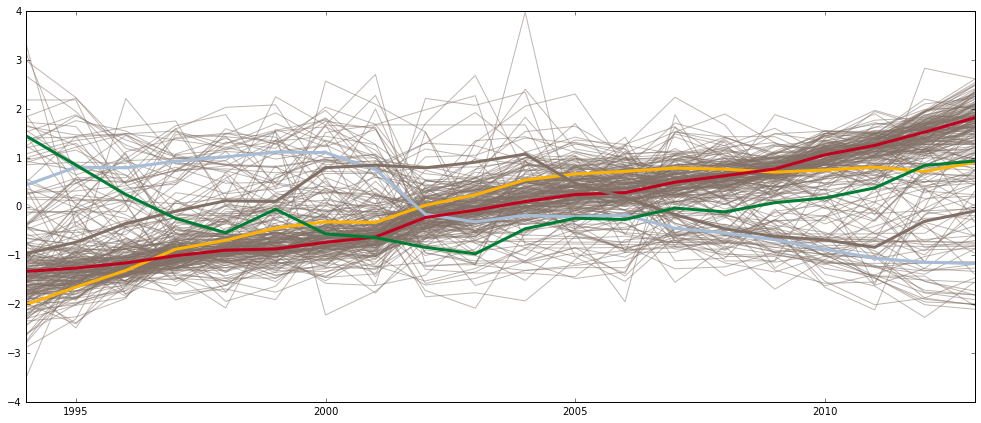

In [34]:
# Visualization of the cluster centers

plt.figure(figsize=(17,7))
plt.xlim(1994,2013)
for i in range(len(outcomes)):
    plt.plot(outcomes.iloc[i],'#817066',alpha=0.5)
for ii in range(5):
    plt.plot(cluster_means.iloc[ii],c=colors[ii],linewidth=3)


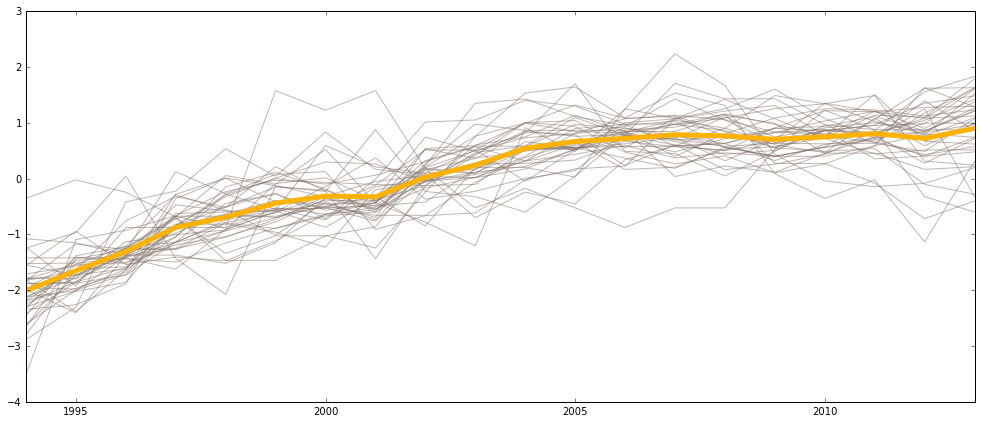

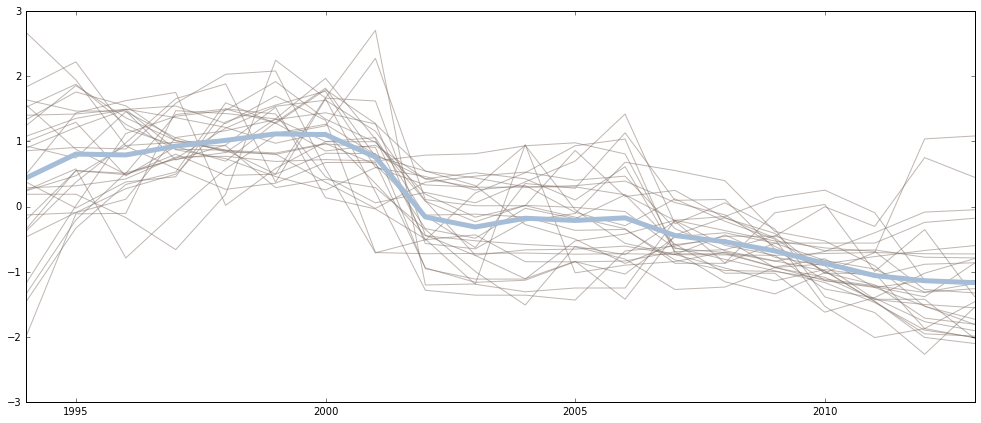

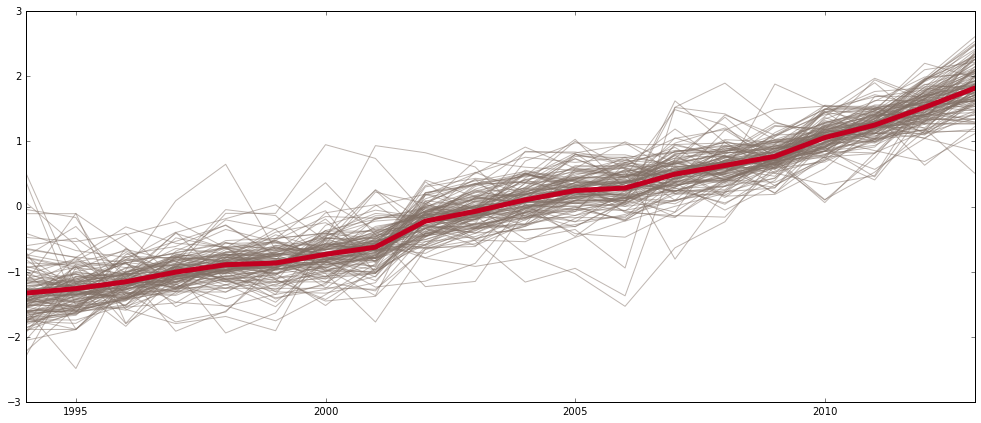

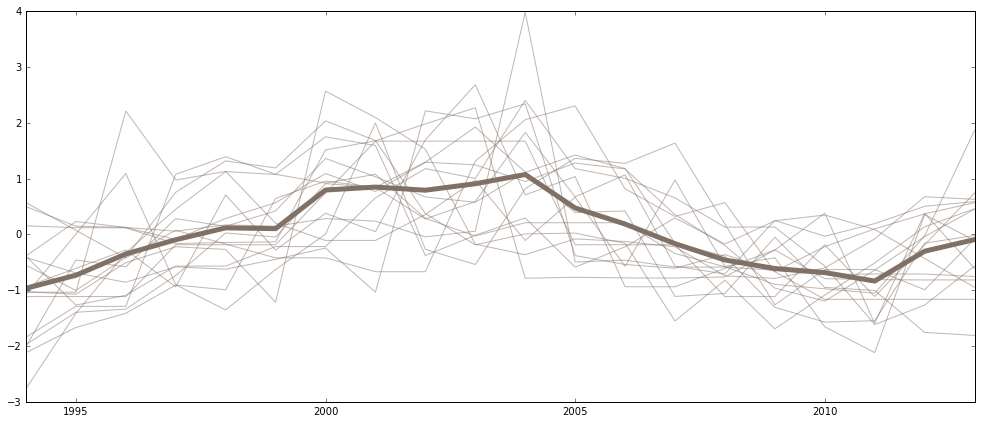

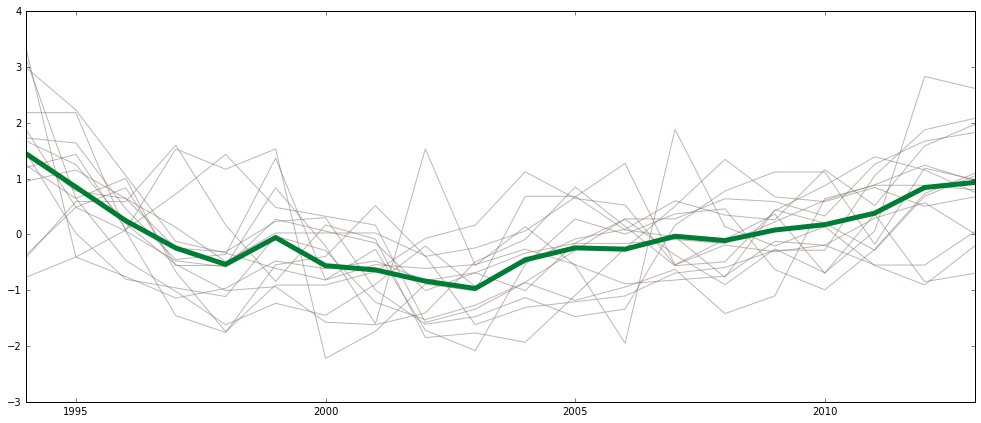

In [35]:
# Visualization of each cluster center
for i in range(5):
    plt.figure(figsize=(17,7))
    plt.xlim(1994,2013)
    for j in range(len(outcomes)):
        if labels[j] == i:
            plt.plot(outcomes.iloc[j],'#817066',alpha=0.5)
    plt.plot(cluster_means.iloc[i],c=colors[i],linewidth=5)

###Agglomerative Clustering

In [38]:
from sklearn.cluster import AgglomerativeClustering

In [39]:
agc = AgglomerativeClustering(n_clusters=5,  
                              linkage='average').fit(outcomes)
labelsag = agc.labels_
labelsag

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 4, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 4, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 3, 0, 0, 4, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 4, 1, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 4, 4, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 1, 4, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 1, 0, 3, 2, 0, 0, 0, 4, 0, 0,
       0, 0, 0, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 0, 0, 4, 0, 0, 0,
       0, 1, 1, 4, 0, 1, 0, 3, 4, 0, 4, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 4])

In [40]:
# Use weighted average to calculate the cluster centers

w = np.zeros((5, len(outcomes)))
for i in range(len(outcomes)):w[labelsag[i]][i] = 1
cluster_means = [np.average(outcomes, axis=0, weights=(w[i])) for i in range(5)]

In [41]:
cluster_means = pd.DataFrame(cluster_means)

In [42]:
cluster_means.columns = ['1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013']

In [43]:
cluster_means

1994      1995      1996      1997      1998      1999      2000  \
0 -1.373243 -1.272357 -1.146479 -0.951575 -0.834551 -0.728663 -0.646003   
1 -0.926743 -0.672319 -0.495270 -0.193302 -0.035637  0.004701  0.741354   
2  2.552136  1.386388  0.738177 -0.701406 -1.097797 -0.306652 -0.581998   
3  0.464131  0.793843  0.573572  0.932374  0.793064  0.062157  0.612439   
4  0.414508  0.755146  0.836106  0.902926  0.989266  1.109584  1.041604   

       2001      2002      2003      2004      2005      2006      2007  \
0 -0.562889 -0.205190 -0.056515  0.164855  0.318441  0.360306  0.529960   
1  0.781094  0.756617  0.894998  1.169641  0.531089  0.283466 -0.132772   
2 -0.574060  0.114374 -0.293267  0.264776  0.053462 -0.259803 -0.007783   
3 -0.172812 -1.581161 -1.485406 -1.323177 -1.296483 -0.804083 -0.141439   
4  0.747576 -0.101957 -0.231406 -0.135690 -0.139224 -0.170623 -0.389403   

       2008      2009      2010      2011      2012      2013  
0  0.619282  0.728217  0.956446  1.129876  1.359068  1.611013  
1 -0.347526 -0.581905 -0.607261 -0.712834 -0.389147 -0.068244  
2 -0.222707 -0.070112 -0.235702 -0.112989 -0.433903 -0.211133  
3  0.061726  0.058202  0.586558  0.309491  0.830716  0.726288  
4 -0.546262 -0.681008 -0.931377 -1.125672 -1.154255 -1.189839

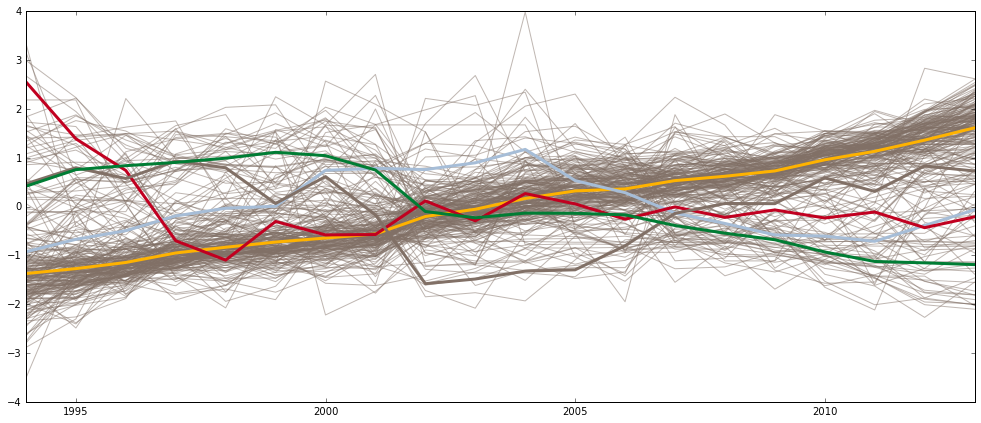

In [44]:
# Visualization of the cluster centers

plt.figure(figsize=(17,7))
plt.xlim(1994,2013)
for i in range(len(outcomes)):
    plt.plot(outcomes.iloc[i],'#817066',alpha=0.5)
for ii in range(5):
    plt.plot(cluster_means.iloc[ii],c=colors[ii],linewidth=3)


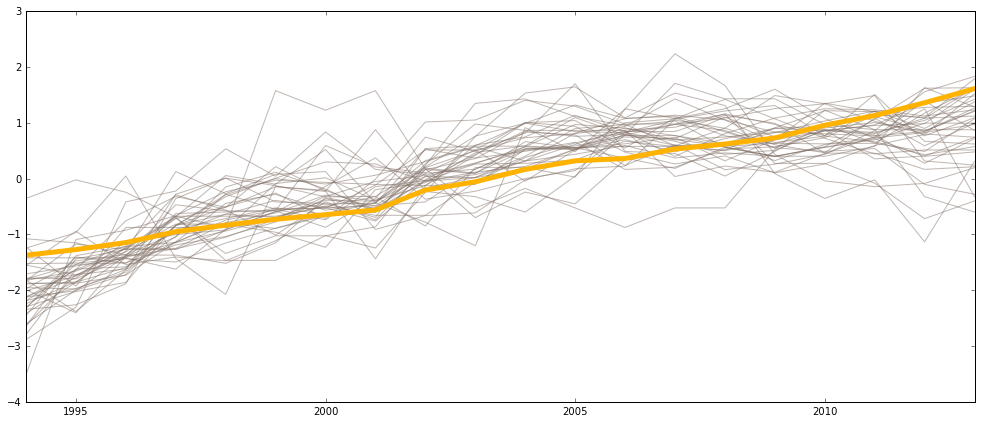

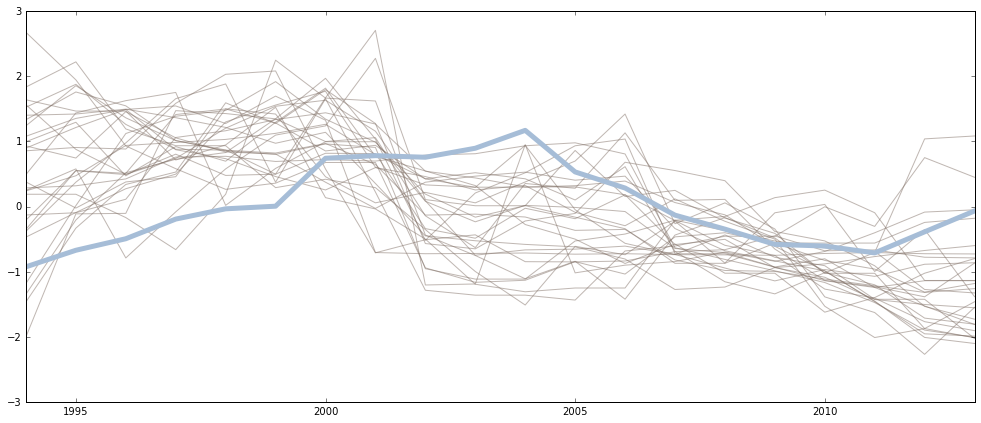

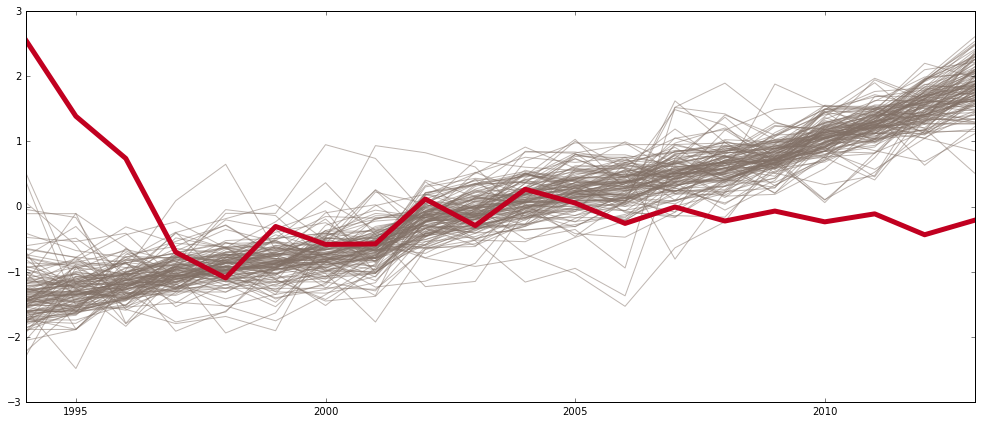

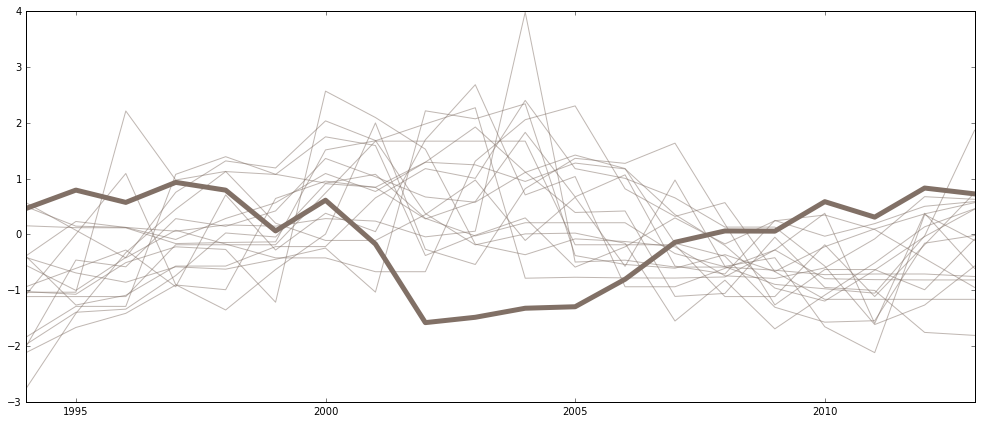

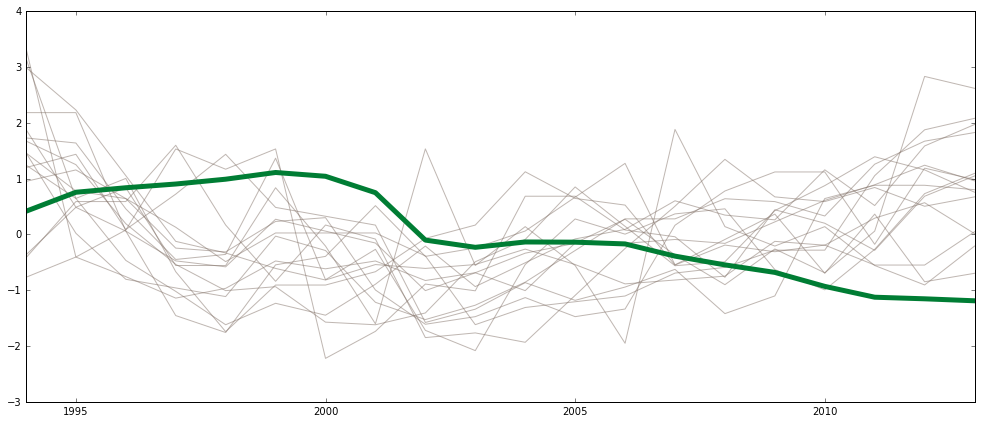

In [45]:
# Visualization of each cluster center
for i in range(5):
    plt.figure(figsize=(17,7))
    plt.xlim(1994,2013)
    for j in range(len(outcomes)):
        if labels[j] == i:
            plt.plot(outcomes.iloc[j],'#817066',alpha=0.5)
    plt.plot(cluster_means.iloc[i],c=colors[i],linewidth=5)

##Overlay

/Users/jiangzeyu/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


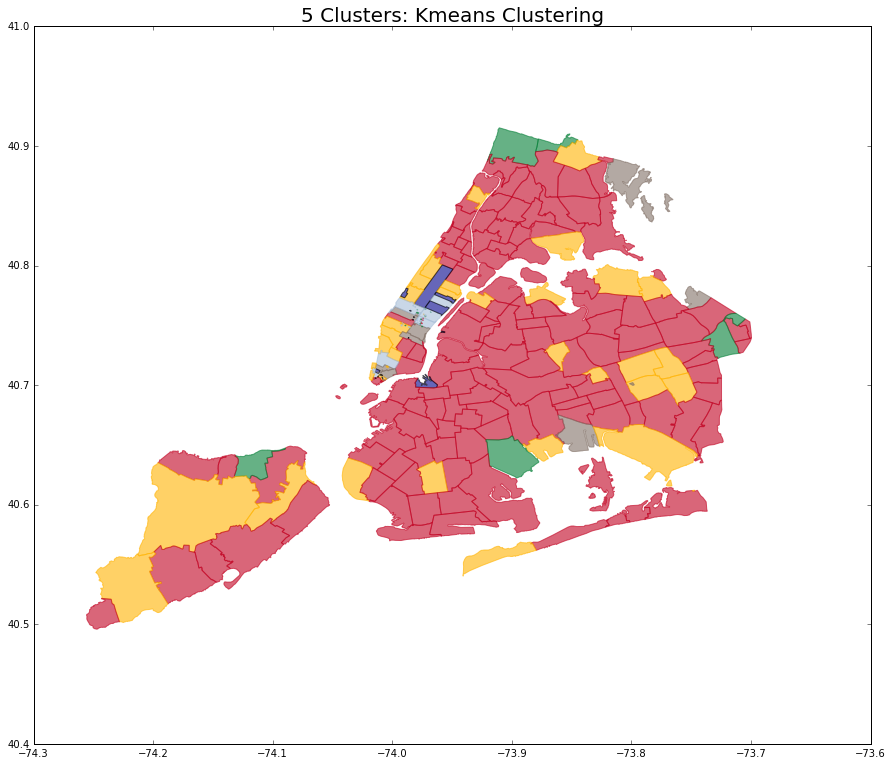

In [46]:
ind = []
from descartes import PolygonPatch
fig = plt.figure(figsize=(15,15)) 
for i in nyc['features']:
    poly = i['geometry']
    postcode = str(i['properties']['postalCode'])
    ax = fig.gca()
    if postcode in list(bizzip):
        ind = list(bizzip).index(postcode)
        ax.add_patch(PolygonPatch(poly, fc=colors[labels[ind]], ec=colors[labels[ind]], alpha=0.6, zorder=2 ))
    else:
        ax.add_patch(PolygonPatch(poly, fc='darkblue', ec='black', alpha=0.6, zorder=2 ))
ax.axis('scaled')
plt.legend()
plt.title('5 Clusters: Kmeans Clustering', size=20)

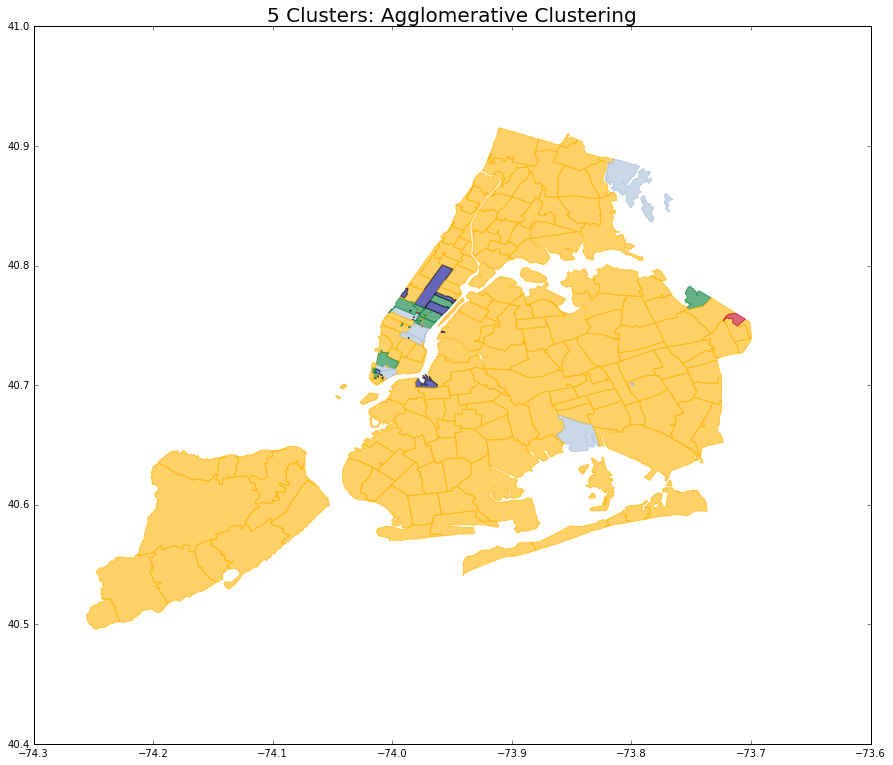

In [48]:
from descartes import PolygonPatch
fig = plt.figure(figsize=(15,15)) 
for i in nyc['features']:
    poly = i['geometry']
    postcode = str(i['properties']['postalCode'])
    ax = fig.gca()
    if postcode in list(bizzip):
        ind = list(bizzip).index(postcode)
        ax.add_patch(PolygonPatch(poly, fc=colors[labelsag[ind]], ec=colors[labelsag[ind]], alpha=0.6, zorder=2 ))
    else:
        ax.add_patch(PolygonPatch(poly, fc='darkblue', ec='black', alpha=0.6, zorder=2 ))
ax.axis('scaled')

plt.title('5 Clusters: Agglomerative Clustering', size=20)

###Compare the results of the 2 algorithms

######With comparing two algorithms, it is hard to say which one is better. However, there are more details that show in the Kmeans clustering overlay plots. 

IMPORTANT: we talked about the importance of "whitening" your data: dividing each feature by its standard deviation. 
Whitenings decorrelates the data: it makes the features independent so that the data covariance matrix is the identity matrix.
Whitening your data in time series analysis is in most cases **wrong**: you are modifying your time behaviour. This is because of the strong correlation between features (two consecutive time stamps for the same observation, the same zip code here, are strongly correlated). Here instead you want to standardize your time series: subtract the mean and divide each time series (separately) by its standard deviation. As a sanity check (if you use skitlearn Kmeans or skitlearns kmeans2): you want your data array to be shaped Nzipcodes x Ntimestamps

mydata.shape should be (Nzipcodes, Ntimestamps)

mydata[i].std() shoould be 1 for all i in range(len(Nzipcodes))

mydata[i].mean() should be ~0 for all i in range(len(Nzipcodes))



TASKS:
    
    1. get and prep your data.
    2. cluster the NUMBER OF ESTABLISHMENTS time series with K-means in **a few** clusters (as discussed there is no real good, sound way to decide what a good number is here. try a few options, keeping in mind a few is more than a couple, but i recommand you stay within the single digit numbers)
    3. plot the cluster centers (if you used K means those are the means of the clusters). you can plot for example the cluster centers overlayed on each time series (using the alpha channel to control the opacity in the plot may be helpful here).
    4. Use another clustering algorithm (of your choice)
    5. overlay your data on a NYC map: you can use shapefiles for the zip codes and different colors for different clusters
    6. Compare the results of the 2 algorithms
    7. attempt an interpretation. this is dangerous ground: clustering is an exploratory tool so you do not want to jump to conclusions because you see some clusters! but seeing structure in your data can inform your next moves as an investigator. 
    